In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
match= pd.read_csv('matches.csv')
delivery= pd.read_csv('deliveries.csv')

In [ ]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


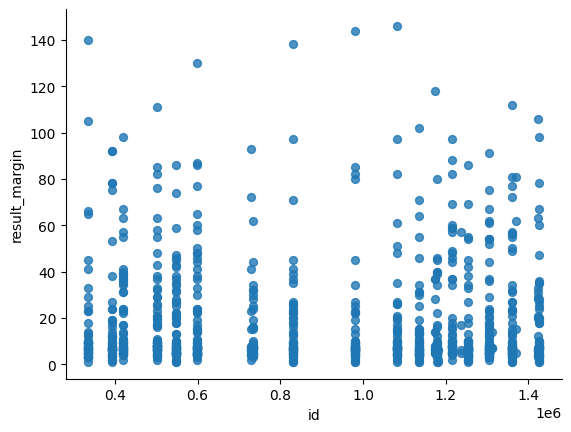

In [ ]:
# @title id vs result_margin

from matplotlib import pyplot as plt
match.plot(kind='scatter', x='id', y='result_margin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

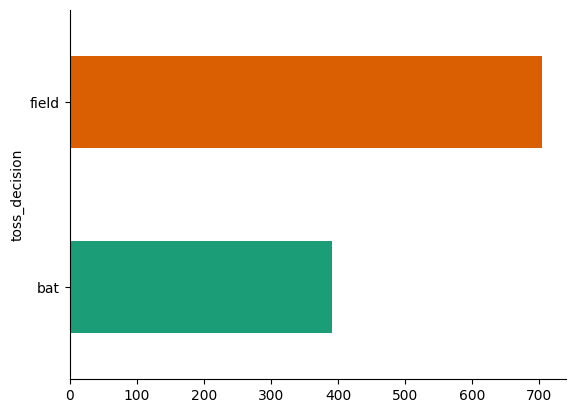

In [ ]:
# @title toss_decision

from matplotlib import pyplot as plt
import seaborn as sns
match.groupby('toss_decision').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
match.shape

(1095, 20)

In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3.0,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [ ]:
delivery.shape

(81794, 17)

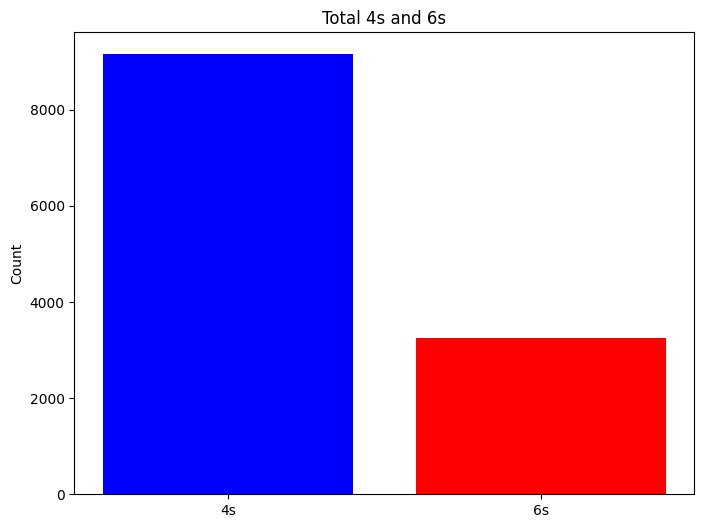

In [ ]:
# Assuming 'delivery' has a 'batsman_runs' column
fours = delivery[delivery['batsman_runs'] == 4].shape[0]
sixes = delivery[delivery['batsman_runs'] == 6].shape[0]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['4s', '6s'], [fours, sixes], color=['blue', 'red'])
plt.title('Total 4s and 6s')
plt.ylabel('Count')
plt.show()

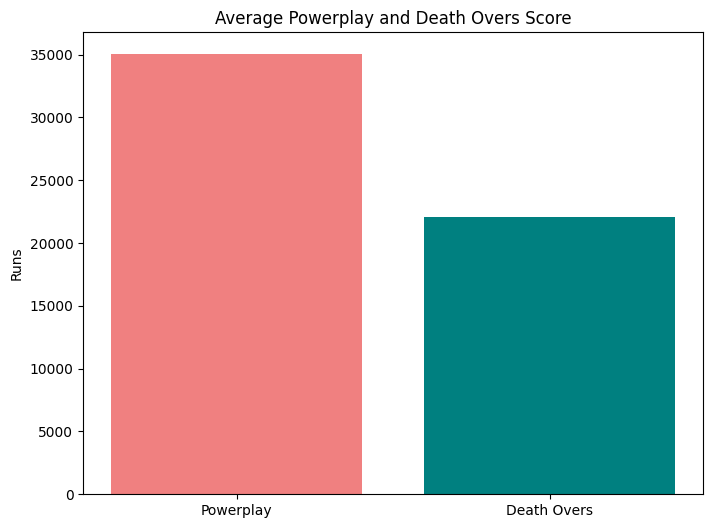

In [ ]:
# Assuming 'delivery' has 'over' and 'total_runs' columns
powerplay_score = delivery[delivery['over'] <= 6]['total_runs'].sum()
death_overs_score = delivery[delivery['over'] >= 16]['total_runs'].sum()

# Calculate average scores (you'll need the number of powerplay/death overs played)
# ...

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Powerplay', 'Death Overs'], [powerplay_score, death_overs_score], color=['lightcoral', 'teal'])
plt.title('Average Powerplay and Death Overs Score')
plt.ylabel('Runs')
plt.show()

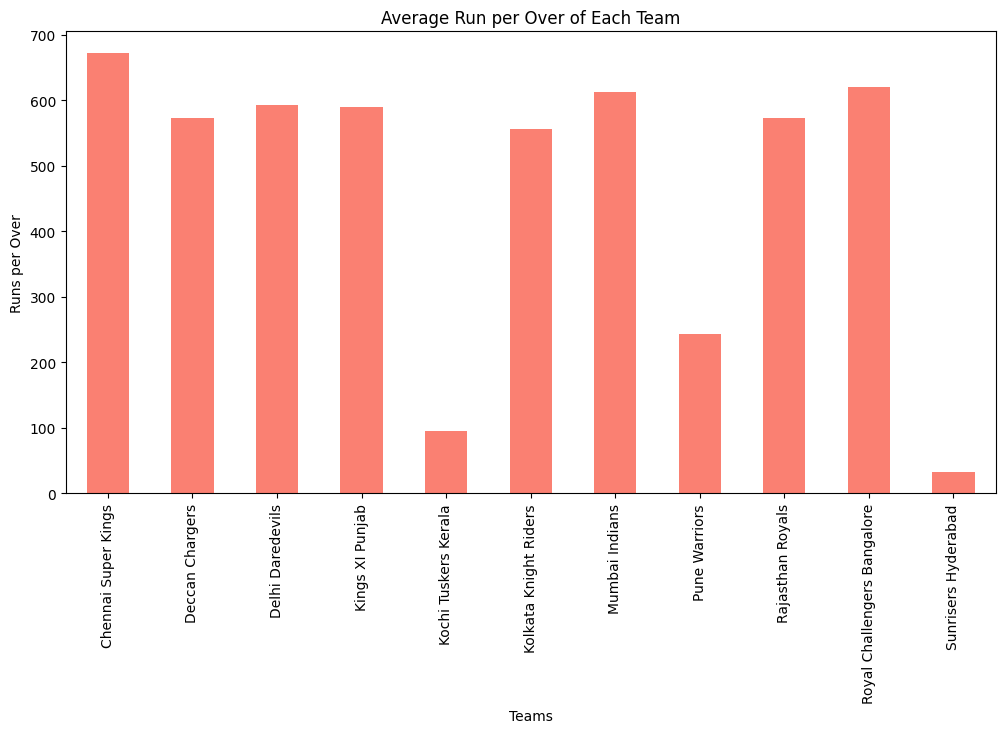

In [ ]:
# Assuming 'delivery' has 'batting_team', 'over', and 'total_runs' columns
team_runs_per_over = delivery.groupby(['batting_team', 'over'])['total_runs'].sum().reset_index()
average_runs_per_over = team_runs_per_over.groupby('batting_team')['total_runs'].mean()

# Plotting
plt.figure(figsize=(12, 6))
average_runs_per_over.plot(kind='bar', color='salmon')
plt.title('Average Run per Over of Each Team')
plt.xlabel('Teams')
plt.ylabel('Runs per Over')
plt.show()

In [ ]:
powerplay_data = delivery[delivery['over'] <= 6]  # Filter for powerplay overs (1-6)

# 1. Total Runs Scored in Powerplay by Each Team
powerplay_runs_by_team = powerplay_data.groupby('batting_team')['total_runs'].sum()

# 2. Average Runs per Over in Powerplay by Each Team
average_runs_per_over_powerplay = powerplay_data.groupby('batting_team')['total_runs'].mean()

# 3. Wickets Lost in Powerplay by Each Team
wickets_lost_powerplay = powerplay_data[powerplay_data['player_dismissed'] != '0'].groupby('batting_team').size()

# 4. Boundaries (4s and 6s) Hit in Powerplay by Each Team
boundaries_powerplay = powerplay_data[powerplay_data['batsman_runs'].isin([4, 6])].groupby('batting_team').size()

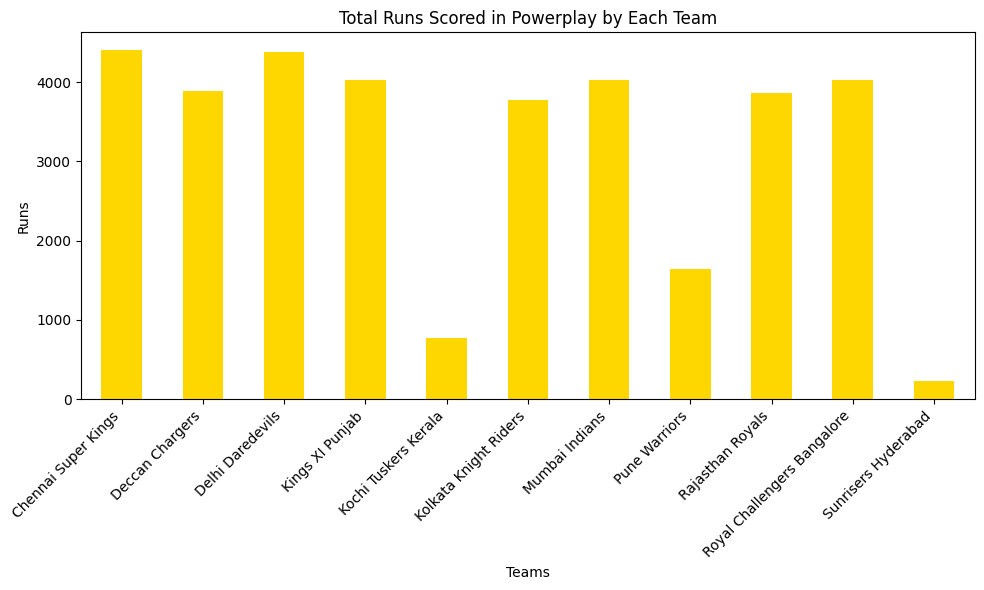

In [ ]:
# Plotting Total Runs Scored in Powerplay by Each Team
plt.figure(figsize=(10, 6))
powerplay_runs_by_team.plot(kind='bar', color='gold')
plt.title('Total Runs Scored in Powerplay by Each Team')
plt.xlabel('Teams')
plt.ylabel('Runs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [ ]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222.0
2,335983,1,240.0
4,335984,1,129.0
6,335985,1,165.0
8,335986,1,110.0
...,...,...,...
685,598016,1,157.0
687,598017,1,152.0
691,598018,1,119.0
693,598019,1,179.0


In [ ]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222.0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240.0
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129.0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165.0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,598016,2013,Chandigarh,2013-04-16,League,MS Gony,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,...,runs,4.0,158.0,20.0,N,NaN,CK Nandan,SJA Taufel,598016,157.0
341,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,...,tie,NaN,153.0,20.0,Y,NaN,M Erasmus,VA Kulkarni,598017,152.0
342,598018,2013,Pune,2013-04-17,League,A Mishra,Maharashtra Cricket Association Stadium,Pune Warriors,Sunrisers Hyderabad,Pune Warriors,...,runs,11.0,120.0,20.0,N,NaN,Asad Rauf,AK Chaudhary,598018,119.0
343,598019,2013,Jaipur,2013-04-17,League,AM Rahane,Sawai Mansingh Stadium,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,...,runs,87.0,180.0,20.0,N,NaN,Aleem Dar,C Shamshuddin,598019,179.0


In [ ]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad'],
      dtype=object)

In [ ]:
teams=['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings']

In [ ]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(293, 22)

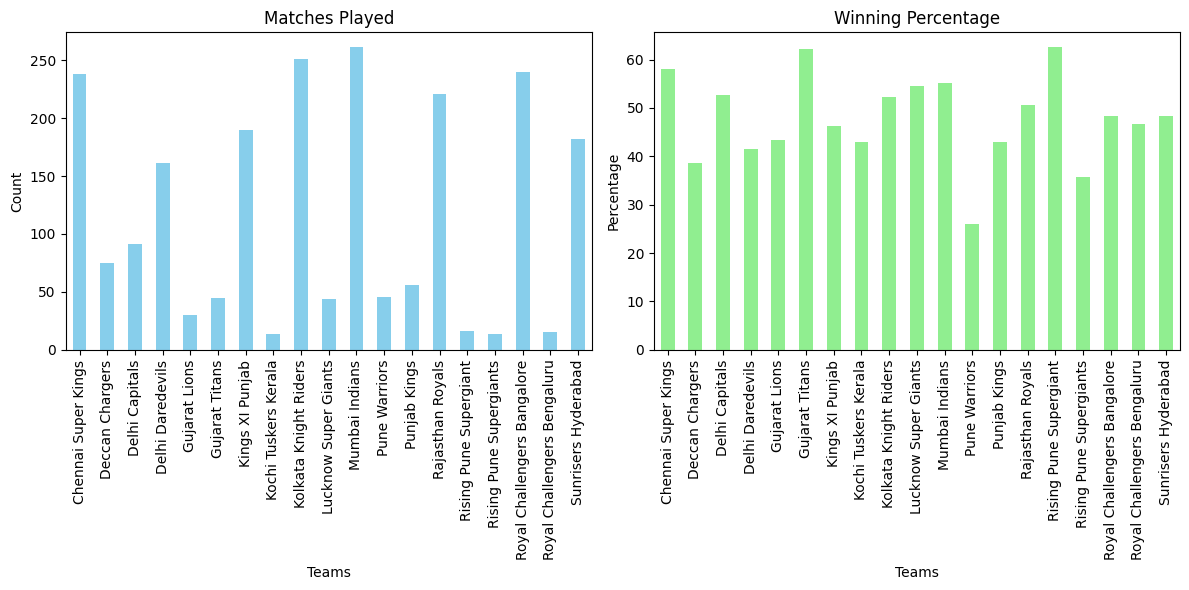

In [ ]:

teams = match['team1'].unique()  # Get unique team names
matches_played = match['team1'].value_counts() + match['team2'].value_counts()
wins = match.groupby('winner')['winner'].count()
win_percentage = (wins / matches_played) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
matches_played.plot(kind='bar', color='skyblue')
plt.title('Matches Played')
plt.xlabel('Teams')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
win_percentage.plot(kind='bar', color='lightgreen')
plt.title('Winning Percentage')
plt.xlabel('Teams')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

In [ ]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df=match_df.merge(delivery, on='match_id')

In [ ]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [ ]:
delivery_df.shape

(33602, 20)

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1.0,R Dravid,AB Dinda,W Jaffer,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2.0,W Jaffer,AB Dinda,R Dravid,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3.0,W Jaffer,AB Dinda,R Dravid,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4.0,W Jaffer,AB Dinda,R Dravid,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5.0,R Dravid,AB Dinda,W Jaffer,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69559,598019,Jaipur,Rajasthan Royals,179.0,2,Mumbai Indians,Rajasthan Royals,17.0,5.0,SL Malinga,KK Cooper,PP Ojha,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
69560,598019,Jaipur,Rajasthan Royals,179.0,2,Mumbai Indians,Rajasthan Royals,17.0,6.0,SL Malinga,KK Cooper,PP Ojha,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
69561,598019,Jaipur,Rajasthan Royals,179.0,2,Mumbai Indians,Rajasthan Royals,17.0,7.0,SL Malinga,KK Cooper,PP Ojha,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
69562,598019,Jaipur,Rajasthan Royals,179.0,2,Mumbai Indians,Rajasthan Royals,18.0,1.0,SL Malinga,JP Faulkner,PP Ojha,4.0,0.0,4.0,NaN,0.0,NaN,NaN,NaN


In [ ]:


# Convert 'total_runs_y' to numeric, handling errors by setting non-numeric values to 0
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce').fillna(0).astype(int)

# Now apply the cumsum function
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [ ]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [ ]:
delivery_df['balls_left']=120 - (delivery_df['over']*6 + delivery_df['ball'])

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1.0,R Dravid,...,0.0,1,NaN,0.0,NaN,NaN,NaN,1,221.0,119.0
125,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2.0,W Jaffer,...,1.0,1,wides,0.0,NaN,NaN,NaN,2,220.0,118.0
126,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3.0,W Jaffer,...,0.0,0,NaN,0.0,NaN,NaN,NaN,2,220.0,117.0
127,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4.0,W Jaffer,...,0.0,1,NaN,0.0,NaN,NaN,NaN,3,219.0,116.0
128,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5.0,R Dravid,...,0.0,1,NaN,0.0,NaN,NaN,NaN,4,218.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69559,598019,Jaipur,Rajasthan Royals,179.0,2,Mumbai Indians,Rajasthan Royals,17.0,5.0,SL Malinga,...,0.0,0,NaN,0.0,NaN,NaN,NaN,86,93.0,13.0
69560,598019,Jaipur,Rajasthan Royals,179.0,2,Mumbai Indians,Rajasthan Royals,17.0,6.0,SL Malinga,...,1.0,1,wides,0.0,NaN,NaN,NaN,87,92.0,12.0
69561,598019,Jaipur,Rajasthan Royals,179.0,2,Mumbai Indians,Rajasthan Royals,17.0,7.0,SL Malinga,...,0.0,1,NaN,0.0,NaN,NaN,NaN,88,91.0,11.0
69562,598019,Jaipur,Rajasthan Royals,179.0,2,Mumbai Indians,Rajasthan Royals,18.0,1.0,SL Malinga,...,0.0,4,NaN,0.0,NaN,NaN,NaN,92,87.0,11.0


In [ ]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna('0')
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=='0' else '1')
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype(int) # Ensure 'player_dismissed' is of numeric type
wickets=delivery_df.groupby('match_id')['player_dismissed'].cumsum().values # Apply cumsum on numeric column
delivery_df['wickets']=10-wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1.0,R Dravid,...,1,NaN,0.0,0,NaN,NaN,1,221.0,119.0,10
125,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2.0,W Jaffer,...,1,wides,0.0,0,NaN,NaN,2,220.0,118.0,10
126,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3.0,W Jaffer,...,0,NaN,0.0,0,NaN,NaN,2,220.0,117.0,10
127,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4.0,W Jaffer,...,1,NaN,0.0,0,NaN,NaN,3,219.0,116.0,10
128,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5.0,R Dravid,...,1,NaN,0.0,0,NaN,NaN,4,218.0,115.0,10


#current runs/overs

In [ ]:
delivery_df['curr']=(delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

required run rate

In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,curr,rrr
124,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1.0,R Dravid,...,0.0,0,NaN,NaN,1,221.0,119.0,10,6.000000,11.142857
125,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2.0,W Jaffer,...,0.0,0,NaN,NaN,2,220.0,118.0,10,6.000000,11.186441
126,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3.0,W Jaffer,...,0.0,0,NaN,NaN,2,220.0,117.0,10,4.000000,11.282051
127,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4.0,W Jaffer,...,0.0,0,NaN,NaN,3,219.0,116.0,10,4.500000,11.327586
128,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5.0,R Dravid,...,0.0,0,NaN,NaN,4,218.0,115.0,10,4.800000,11.373913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69559,598019,Jaipur,Rajasthan Royals,179.0,2,Mumbai Indians,Rajasthan Royals,17.0,5.0,SL Malinga,...,0.0,0,NaN,NaN,86,93.0,13.0,1,4.822430,42.923077
69560,598019,Jaipur,Rajasthan Royals,179.0,2,Mumbai Indians,Rajasthan Royals,17.0,6.0,SL Malinga,...,0.0,0,NaN,NaN,87,92.0,12.0,1,4.833333,46.000000
69561,598019,Jaipur,Rajasthan Royals,179.0,2,Mumbai Indians,Rajasthan Royals,17.0,7.0,SL Malinga,...,0.0,0,NaN,NaN,88,91.0,11.0,1,4.844037,49.636364
69562,598019,Jaipur,Rajasthan Royals,179.0,2,Mumbai Indians,Rajasthan Royals,18.0,1.0,SL Malinga,...,0.0,0,NaN,NaN,92,87.0,11.0,1,5.064220,47.454545


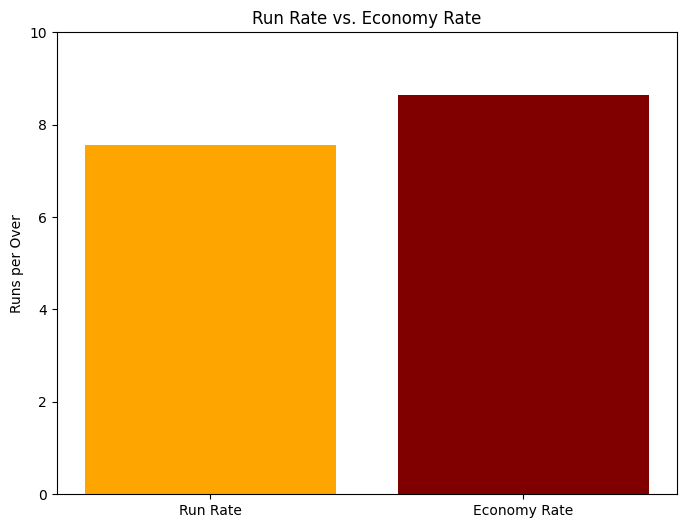

In [ ]:


# 1. Calculate Run Rate
total_runs = delivery['total_runs'].sum()
total_balls = delivery.shape[0]
run_rate = (total_runs / total_balls) * 6  # Runs per over

# 2. Calculate Economy Rate
bowlers = delivery.groupby('bowler')
total_runs_conceded = bowlers['total_runs'].sum()
total_overs_bowled = delivery.groupby(['match_id', 'bowler', 'over']).size().groupby(['match_id', 'bowler']).size().groupby('bowler').sum()
bowling_economy_rate = total_runs_conceded / total_overs_bowled

# 3. Prepare data for plotting
# Create a DataFrame with run rate and average economy rate
data = {'Metric': ['Run Rate', 'Economy Rate'],
        'Value': [run_rate, bowling_economy_rate.mean()]}  # Use the mean economy rate
df = pd.DataFrame(data)

# 4. Plotting
plt.figure(figsize=(8, 6))
plt.bar(df['Metric'], df['Value'], color=['orange', 'maroon'])
plt.title('Run Rate vs. Economy Rate')
plt.ylabel('Runs per Over')
plt.ylim(0, 10)  # Set y-axis limits for better visualization
plt.show()

In [ ]:
def result(row):
  return 1 if row['batting_team']== row['winner'] else 0

In [ ]:
# Use apply to evaluate the function row by row
delivery_df['result'] = delivery_df.apply(lambda row: result(row), axis=1)



In [ ]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,curr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1.0,R Dravid,...,0,NaN,NaN,1,221.0,119.0,10,6.0,11.142857,0
125,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2.0,W Jaffer,...,0,NaN,NaN,2,220.0,118.0,10,6.0,11.186441,0
126,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3.0,W Jaffer,...,0,NaN,NaN,2,220.0,117.0,10,4.0,11.282051,0
127,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4.0,W Jaffer,...,0,NaN,NaN,3,219.0,116.0,10,4.5,11.327586,0
128,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5.0,R Dravid,...,0,NaN,NaN,4,218.0,115.0,10,4.8,11.373913,0


In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','curr','rrr','result']]

In [ ]:
final_df=final_df.sample(final_df.shape[0])

In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,curr,rrr,result
18572,Kings XI Punjab,Royal Challengers Bangalore,Durban,60.0,41.0,7,145.0,6.455696,8.780488,0


In [ ]:
final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,0
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
curr,0
rrr,4
result,0


In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df = final_df[final_df['balls_left']!=0]

In [ ]:
X= final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,curr,rrr
66087,Delhi Daredevils,Chennai Super Kings,Chennai,148.0,70.0,8,222.0,8.880000,12.685714
15089,Chennai Super Kings,Delhi Daredevils,Durban,98.0,70.0,8,189.0,10.920000,8.400000
7995,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,25.0,39.0,9,143.0,8.740741,3.846154
12954,Delhi Daredevils,Rajasthan Royals,Mumbai,169.0,92.0,8,192.0,4.928571,11.021739
30158,Kolkata Knight Riders,Rajasthan Royals,Ahmedabad,109.0,66.0,9,168.0,6.555556,9.909091
...,...,...,...,...,...,...,...,...,...
8930,Kings XI Punjab,Delhi Daredevils,Delhi,115.0,114.0,10,118.0,3.000000,6.052632
5614,Rajasthan Royals,Chennai Super Kings,Jaipur,97.0,104.0,10,109.0,4.500000,5.596154
18598,Kings XI Punjab,Royal Challengers Bangalore,Durban,25.0,16.0,6,145.0,6.923077,9.375000
3433,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,163.0,100.0,9,178.0,4.500000,9.780000


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8253209913406987

In [ ]:
pipe.predict_proba(X_test)[2]

array([0.13795154, 0.86204846])

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9998507017020006

In [ ]:
pipe.predict_proba(X_test)[4]

array([0.02, 0.98])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','curr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target



In [ ]:
print(delivery_df['match_id'].unique())


[335982 335983 335984 335985 335986 335987 335988 335989 335990 335991
 335992 335993 335994 335995 335996 335997 335998 335999 336000 336001
 336003 336034 336004 336005 336006 336007 336008 336009 336010 336011
 336013 336014 336015 336016 336017 336018 336020 336021 336022 336023
 336024 336025 336026 336027 336028 336029 336031 336032 336033 336002
 336035 336036 336037 336012 336019 336038 336039 336040 392181 392182
 392183 392184 392185 392186 392188 392189 392190 392191 392192 392194
 392195 392196 392197 392198 392199 392200 392201 392202 392203 392204
 392205 392206 392207 392208 392209 392210 392211 392212 392213 392214
 392215 392216 392217 392218 392219 392220 392221 392222 392223 392224
 392225 392226 392227 392228 392229 392230 392231 392232 392233 392234
 392235 392236 392237 392238 392239 419106 419107 419108 419109 419110
 419111 419112 419113 419114 419115 419116 419117 419118 419119 419120
 419121 419122 419123 419124 419125 419128 419126 419127 419129 419130
 41913

# predicting an outcome

In [157]:
temp_df, target = match_progression(delivery_df,392227, pipe)
print(temp_df)
print(target)

Target- 147.0
       end_of_over  runs_after_over  wickets_in_over  lose    win
24045            1              4.0                1   0.0  100.0
24051            2             13.0                0   1.0   99.0
24057            3              1.0                0   0.0  100.0
24064            4              6.0                1   1.0   99.0
24070            5             10.0                0   1.0   99.0
24076            6              1.0                0   5.0   95.0
24082            7              4.0                0   0.0  100.0
24088            8              4.0                0   2.0   98.0
24094            9              7.0                0   2.0   98.0
24100           10              6.0                0   4.0   96.0
24106           11              8.0                1   3.0   97.0
24112           12              6.0                0   1.0   99.0
24118           13             13.0                0   0.0  100.0
24125           14              7.0                0   0.0  10

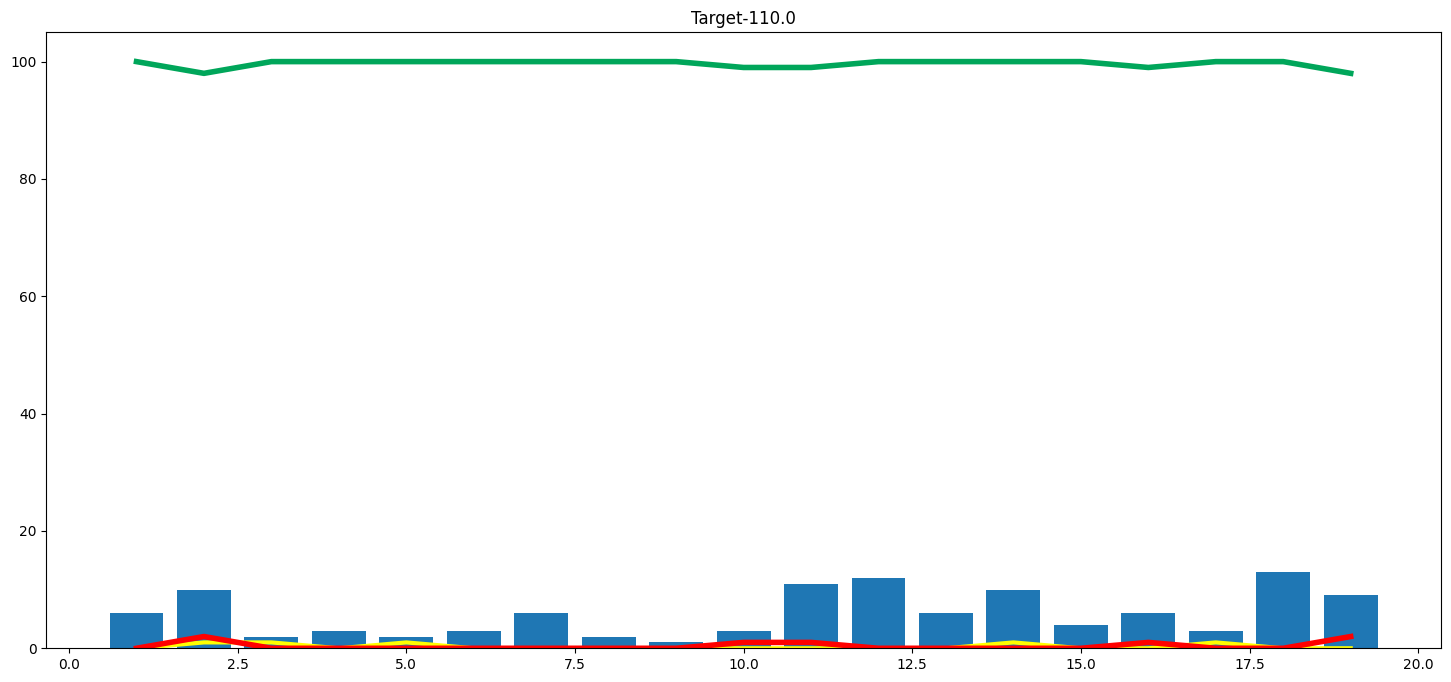

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color='yellow', linewidth=3)
plt.plot(temp_df['end_of_over'], temp_df['win'], color='#00a65a', linewidth=4)
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4)
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])
plt.title('Target-' + str(target))  # Add the closing parenthesis here
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier  # Import VotingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline  # Import Pipeline

# ... (Your existing trf and pipe definitions) ...

# 1. Create Base Learners with Pipelines (reuse your 'pipe')
rf_pipeline = pipe  # Your existing pipeline with trf and RandomForestClassifier

xgb_pipeline = Pipeline(steps=[
    ('preprocessing', trf),
    ('classifier', xgb.XGBClassifier(random_state=42))
])
# ... (potentially a neural network pipeline) ...

# 2. Create Ensemble Model (Voting Classifier)
ensemble_model = VotingClassifier(estimators=[('rf', rf_pipeline), ('xgb', xgb_pipeline)], voting='hard')  # or 'soft'

# 3. Train the Model
ensemble_model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = ensemble_model.predict(X_test)

# 5. Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# ... (Prediction for 2025 - Requires features for 2025 season) ...

Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1-Score: 0.9999


# the top 20 run-scorers

batter
SK Raina            2340.0
G Gambhir           2300.0
RG Sharma           2132.0
SR Tendulkar        2116.0
JH Kallis           2046.0
CH Gayle            2024.0
V Sehwag            1916.0
MS Dhoni            1890.0
V Kohli             1872.0
R Dravid            1848.0
AC Gilchrist        1806.0
RV Uthappa          1668.0
KC Sangakkara       1628.0
DPMD Jayawardene    1605.0
SE Marsh            1603.0
YK Pathan           1567.0
S Dhawan            1540.0
KD Karthik          1485.0
AB de Villiers      1440.0
S Badrinath         1401.0
Name: batsman_runs, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'SK Raina'),
  Text(1, 0, 'G Gambhir'),
  Text(2, 0, 'RG Sharma'),
  Text(3, 0, 'SR Tendulkar'),
  Text(4, 0, 'JH Kallis'),
  Text(5, 0, 'CH Gayle'),
  Text(6, 0, 'V Sehwag'),
  Text(7, 0, 'MS Dhoni'),
  Text(8, 0, 'V Kohli'),
  Text(9, 0, 'R Dravid'),
  Text(10, 0, 'AC Gilchrist'),
  Text(11, 0, 'RV Uthappa'),
  Text(12, 0, 'KC Sangakkara'),
  Text(13, 0, 'DPMD Jayawardene'),
  Text(14, 0, 'SE Marsh'),
  Text(15, 0, 'YK Pathan'),
  Text(16, 0, 'S Dhawan'),
  Text(17, 0, 'KD Karthik'),
  Text(18, 0, 'AB de Villiers'),
  Text(19, 0, 'S Badrinath')])

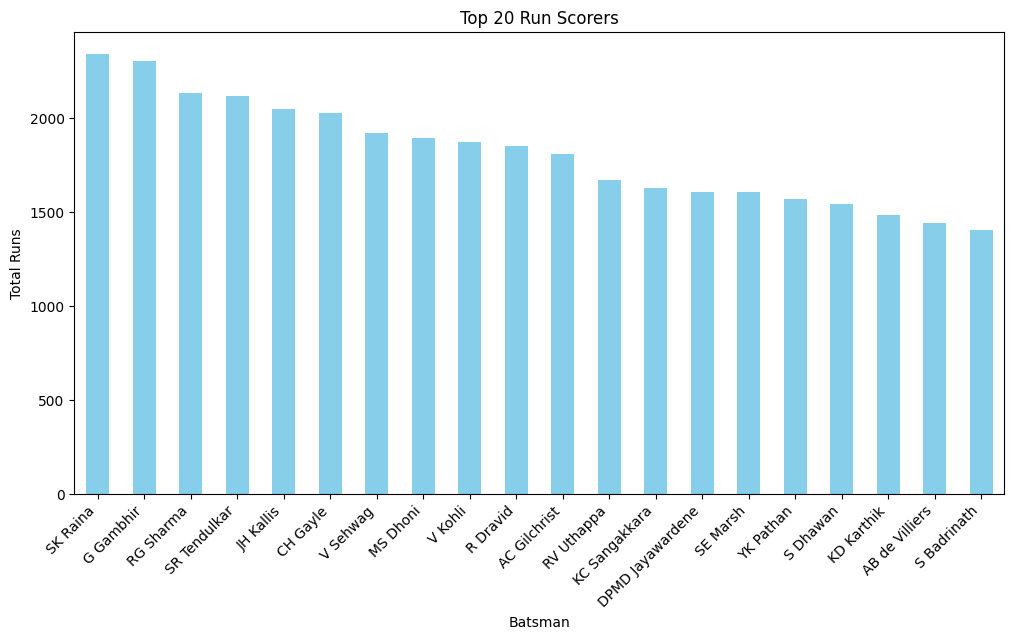

In [ ]:
# 1. Group by batsman and sum runs
top_scorers = delivery.groupby('batter')['batsman_runs'].sum()

# 2. Sort in descending order and get the top 20
top_20_scorers = top_scorers.sort_values(ascending=False)[:20]

# 3. Display or plot the results
print(top_20_scorers)  # Display the top 20 scorers

# Optional: Plot the results
plt.figure(figsize=(12, 6))
top_20_scorers.plot(kind='bar', color='skyblue')
plt.title('Top 20 Run Scorers')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

#Plot Batting Average vs Batting Strike Rate for the top 20 run-scorers

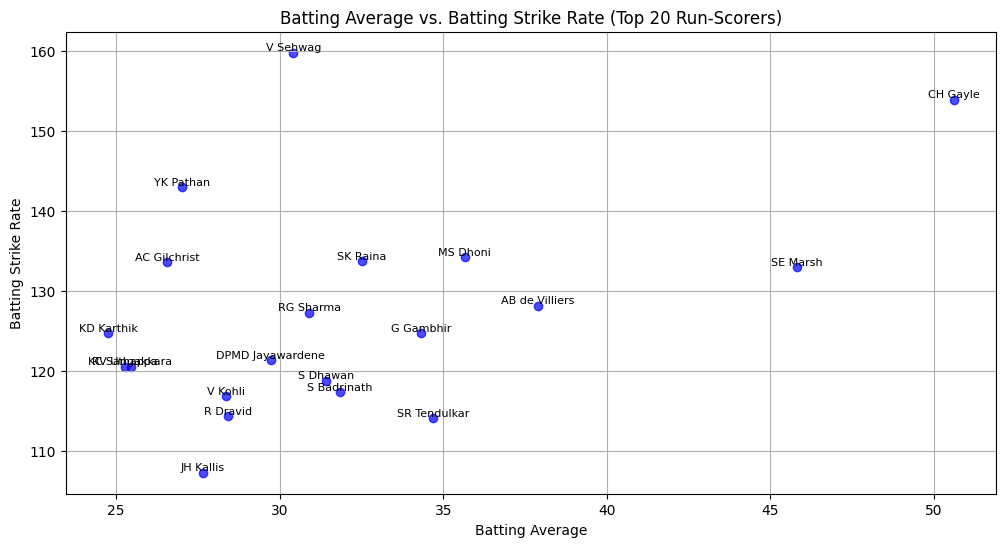

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'delivery' DataFrame is already loaded

# 1. Calculate total runs and balls faced for each batsman
batsman_stats = delivery.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('batsman_runs', 'count')  # Assuming each row represents a ball faced
)

# 2. Calculate batting average and strike rate

# Replace multiple occurrences of player names with single occurrences
delivery['player_dismissed'] = delivery['player_dismissed'].str.strip()  # Remove leading/trailing spaces
delivery['player_dismissed'] = delivery['player_dismissed'].str.replace(r'(.*)\1+', r'\1', regex=True)  # Replace repeating names

# Count dismissals per batsman
dismissals = delivery[delivery['player_dismissed'] != '0'].groupby('batter')['player_dismissed'].count()
# Replace NaN with 0 (some batters might have 0 dismissals)
dismissals = dismissals.reindex(batsman_stats.index, fill_value=0)

batsman_stats['average'] = batsman_stats['total_runs'] / dismissals.astype(int) # avoid division by zero error
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100

# 3. Get the top 20 run-scorers
top_20_scorers = batsman_stats.sort_values(by='total_runs', ascending=False).head(20)

# 4. Plotting
plt.figure(figsize=(12, 6))
plt.scatter(top_20_scorers['average'], top_20_scorers['strike_rate'], color='blue', alpha=0.7)
plt.title('Batting Average vs. Batting Strike Rate (Top 20 Run-Scorers)')
plt.xlabel('Batting Average')
plt.ylabel('Batting Strike Rate')

# Add labels for each batsman (optional)
for i, row in top_20_scorers.iterrows():
    plt.text(row['average'], row['strike_rate'], i, ha='center', va='bottom', fontsize=8)

plt.grid(True)
plt.show()

#Highest Average and Strike Rate for players with >50 matches

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'delivery' DataFrame is already loaded

# 1. Calculate total runs and balls faced for each batsman
batsman_stats = delivery.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('batsman_runs', 'count')  # Assuming each row represents a ball faced
)

# --- Calculate matches played by each batsman ---
matches_played = delivery.groupby('batter')['match_id'].nunique()
batsman_stats = batsman_stats.merge(matches_played, on='batter', how='left') # Merge matches played with stats
batsman_stats.rename(columns={'match_id': 'matches_played'}, inplace=True)

# --- Filter for players with a reasonable number of matches (e.g., > 20) ---
filtered_batsmen = batsman_stats[batsman_stats['matches_played'] > 20] # Changed the threshold to 20

# 2. Calculate batting average and strike rate
# Replace multiple occurrences of player names with single occurrences
delivery['player_dismissed'] = delivery['player_dismissed'].str.strip()  # Remove leading/trailing spaces
delivery['player_dismissed'] = delivery['player_dismissed'].str.replace(r'(.*)\1+', r'\1', regex=True)  # Replace repeating names

# Count dismissals per batsman
dismissals = delivery[delivery['player_dismissed'] != '0'].groupby('batter')['player_dismissed'].count()

# Replace NaN with 0 (some batters might have 0 dismissals)
dismissals = dismissals.reindex(filtered_batsmen.index, fill_value=0)

filtered_batsmen['average'] = filtered_batsmen['total_runs'] / dismissals.astype(int) # avoid division by zero error
filtered_batsmen['strike_rate'] = (filtered_batsmen['total_runs'] / filtered_batsmen['balls_faced']) * 100


# 3. Find highest average and strike rate
highest_average_player = filtered_batsmen.loc[filtered_batsmen['average'].idxmax()]
highest_strike_rate_player = filtered_batsmen.loc[filtered_batsmen['strike_rate'].idxmax()]

print(f"Highest Average: {highest_average_player.name} - {highest_average_player['average']:.2f}") # Change here
print(f"Highest Strike Rate: {highest_strike_rate_player.name} - {highest_strike_rate_player['strike_rate']:.2f}") # Change here

Highest Average: CH Gayle - 50.60
Highest Strike Rate: V Sehwag - 159.80


<ipython-input-141-76b8770d931a>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_batsmen['average'] = filtered_batsmen['total_runs'] / dismissals.astype(int) # avoid division by zero error
<ipython-input-141-76b8770d931a>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_batsmen['strike_rate'] = (filtered_batsmen['total_runs'] / filtered_batsmen['balls_faced']) * 100


# top 20 wicket tackers

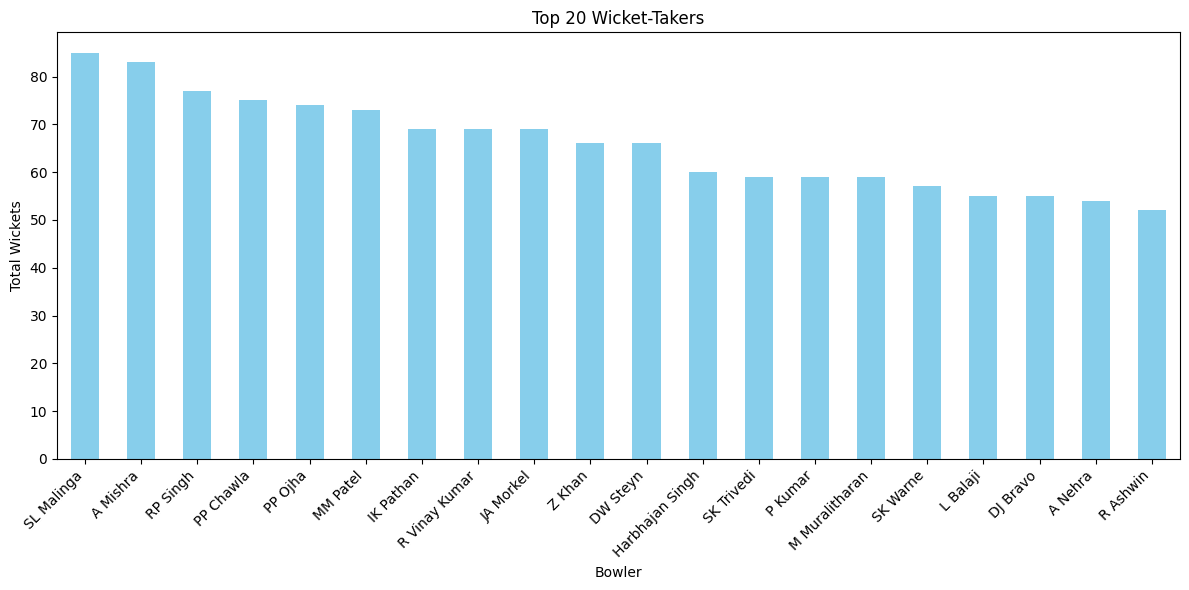

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'delivery' DataFrame is already loaded

# 1. Filter for dismissals (excluding run outs)
dismissals = delivery[delivery['dismissal_kind'] != 'run out']

# 2. Group by bowler and count dismissals
top_wicket_takers = dismissals.groupby('bowler')['player_dismissed'].count()

# 3. Sort in descending order and get the top 20
top_20_wicket_takers = top_wicket_takers.sort_values(ascending=False)[:20]

# 4. Plotting
plt.figure(figsize=(12, 6))
top_20_wicket_takers.plot(kind='bar', color='skyblue')
plt.title('Top 20 Wicket-Takers')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

man of the match analysis


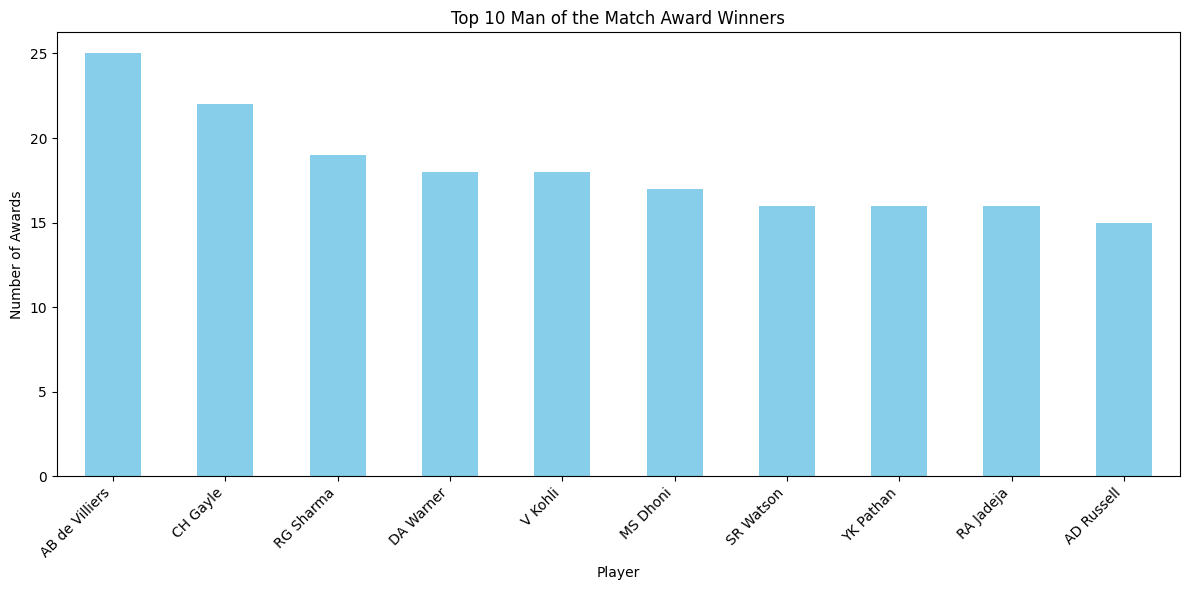

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'matches' DataFrame is already loaded

# 1. Group by 'player_of_match' and count occurrences
man_of_match_counts = match.groupby('player_of_match')['player_of_match'].count()

# 2. Sort in descending order and get the top 10
top_10_man_of_match = man_of_match_counts.sort_values(ascending=False)[:10]

# 3. Plotting
plt.figure(figsize=(12, 6))
top_10_man_of_match.plot(kind='bar', color='skyblue')
plt.title('Top 10 Man of the Match Award Winners')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

#  K-Means Clustering to plot Batting Average vs Bowling Economy Rate for number of clusters = 3 (Batsman, Bowler, All Rounder)

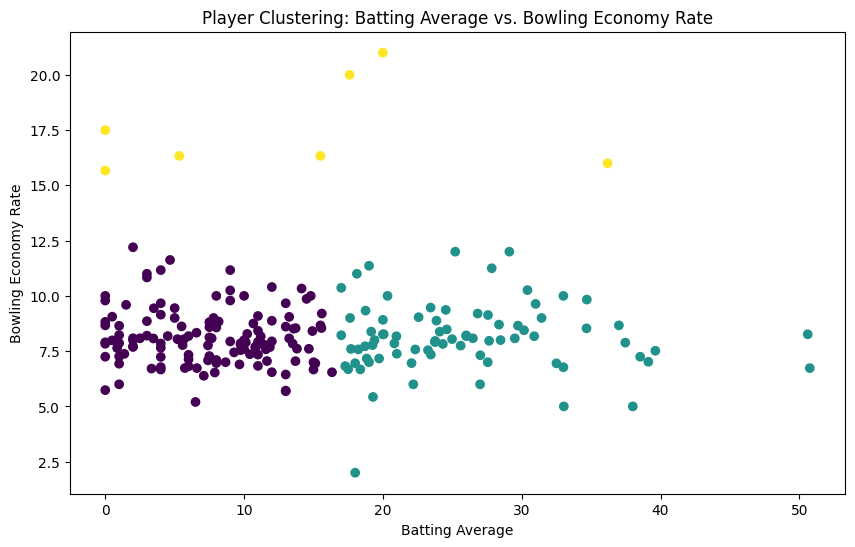

In [ ]:
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'delivery' DataFrame is already loaded

# 1. Calculate Batting Average and Bowling Economy Rate

# --- Batting Average ---
batsman_stats = delivery.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('batsman_runs', 'count')
)
dismissals = delivery[delivery['player_dismissed'] != '0'].groupby('batter')['player_dismissed'].count()
dismissals = dismissals.reindex(batsman_stats.index, fill_value=0)
batsman_stats['average'] = batsman_stats['total_runs'] / dismissals.astype(int)  # Avoid division by zero error
# Replace infinite values with a large number or NaN
batsman_stats['average'] = batsman_stats['average'].replace([np.inf, -np.inf], np.nan)

# --- Bowling Economy Rate ---
bowlers = delivery.groupby('bowler')
total_runs_conceded = bowlers['total_runs'].sum()
total_overs_bowled = delivery.groupby(['match_id', 'bowler', 'over']).size().groupby(['match_id', 'bowler']).size().groupby('bowler').sum()
bowling_economy_rate = total_runs_conceded / total_overs_bowled
# Give the bowling_economy_rate series a name before merging.
bowling_economy_rate.name = 'economy_rate'
# Replace infinite values with a large number or NaN
bowling_economy_rate = bowling_economy_rate.replace([np.inf, -np.inf], np.nan)

# 2. Prepare Data for Clustering
# --- Merge Batting and Bowling Data ---
player_stats = pd.merge(batsman_stats[['average']], bowling_economy_rate, left_index=True, right_index=True, how='outer')
# player_stats.rename(columns={'total_runs': 'economy_rate'}, inplace=True)  # No need for renaming now
player_stats = player_stats.dropna()  # Remove players with missing data

# --- Select Features for Clustering ---
X = player_stats[['average', 'economy_rate']]

# --- Scale the Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters for Batsman, Bowler, All-rounder
kmeans.fit(X_scaled)
player_stats['cluster'] = kmeans.labels_

# 4. Visualize the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(player_stats['average'], player_stats['economy_rate'], c=player_stats['cluster'], cmap='viridis')
plt.title('Player Clustering: Batting Average vs. Bowling Economy Rate')
plt.xlabel('Batting Average')
plt.ylabel('Bowling Economy Rate')



plt.show()

# Identify Top 10 Batsmen in each run category:
Top 6’s scorer
Top 4’s scorer
Top 2’s scorer
Top 1’s scorer

In [ ]:
import pandas as pd

# Assuming 'delivery' DataFrame is already loaded

def top_batsmen_by_run_category(delivery_df, run_value, top_n=10):
    """
    Finds the top batsmen for a specific run category (e.g., 6s, 4s, 2s, 1s).

    Args:
        delivery_df (pd.DataFrame): The deliveries DataFrame.
        run_value (int): The run value to filter by (e.g., 6 for sixes).
        top_n (int, optional): The number of top batsmen to return. Defaults to 10.

    Returns:
        pd.Series: A Series containing the top batsmen and their run counts.
    """
    runs_by_batsman = delivery_df[delivery_df['batsman_runs'] == run_value].groupby('batter')['batsman_runs'].count()
    top_batsmen = runs_by_batsman.sort_values(ascending=False).head(top_n)
    return top_batsmen

# Get top 10 batsmen for each run category
top_6s_scorers = top_batsmen_by_run_category(delivery, 6)
top_4s_scorers = top_batsmen_by_run_category(delivery, 4)
top_2s_scorers = top_batsmen_by_run_category(delivery, 2)
top_1s_scorers = top_batsmen_by_run_category(delivery, 1)

# Print the results
print("Top 10 Sixes Scorers:")
print(top_6s_scorers)

print("\nTop 10 Fours Scorers:")
print(top_4s_scorers)

print("\nTop 10 Twos Scorers:")
print(top_2s_scorers)

print("\nTop 10 Singles Scorers:")
print(top_1s_scorers)

Top 10 Sixes Scorers:
batter
CH Gayle        146
SK Raina         98
RG Sharma        92
AC Gilchrist     87
YK Pathan        85
V Sehwag         79
Yuvraj Singh     71
MS Dhoni         69
RV Uthappa       62
M Vijay          60
Name: batsman_runs, dtype: int64

Top 10 Fours Scorers:
batter
G Gambhir        268
SR Tendulkar     268
V Sehwag         231
R Dravid         223
JH Kallis        220
AC Gilchrist     203
SK Raina         201
KC Sangakkara    189
V Kohli          177
RG Sharma        176
Name: batsman_runs, dtype: int64

Top 10 Twos Scorers:
batter
G Gambhir         138
MS Dhoni          133
SK Raina          115
SR Tendulkar      107
AB de Villiers    102
R Dravid           98
RV Uthappa         95
V Kohli            92
RG Sharma          92
JH Kallis          90
Name: batsman_runs, dtype: int64

Top 10 Singles Scorers:
batter
JH Kallis           744
G Gambhir           706
SK Raina            695
RG Sharma           686
SR Tendulkar        659
V Kohli             626
MS Dhon

#Calculate average runs per match per season

In [ ]:
import pandas as pd

# Assuming 'match' and 'delivery' DataFrames are already loaded

# 1. Merge match and delivery DataFrames on 'match_id'
merged_df = pd.merge(delivery, match[['id', 'season']], left_on='match_id', right_on='id', how='left')

# 2. Group by season and match_id, and sum total_runs
runs_per_match = merged_df.groupby(['season', 'match_id'])['total_runs'].sum().reset_index()

# 3. Group by season and calculate the average runs per match
average_runs_per_season = runs_per_match.groupby('season')['total_runs'].mean()

# 4. Print or display the results
print("Average Runs Per Match Per Season:")
print(average_runs_per_season)

Average Runs Per Match Per Season:
season
2007/08    309.258621
2009       286.894737
2009/10    314.716667
2011       289.780822
2012       303.418919
2013       278.913043
Name: total_runs, dtype: float64


#Identify targets of 200+ runs per season

In [ ]:
import pandas as pd

# Assuming 'match' and 'delivery' DataFrames are already loaded

# 1. Get total runs scored in the first innings of each match
first_innings_runs = delivery[delivery['inning'] == 1].groupby('match_id')['total_runs'].sum()

# 2. Merge with match data to get season information
first_innings_runs = first_innings_runs.reset_index()  # Reset index to make it a DataFrame
first_innings_runs = pd.merge(first_innings_runs, match[['id', 'season']], left_on='match_id', right_on='id')

# 3. Filter for targets of 200+ runs
targets_200_plus = first_innings_runs[first_innings_runs['total_runs'] >= 200]

# 4. Group by season and count the number of 200+ targets
targets_200_plus_per_season = targets_200_plus.groupby('season')['match_id'].count()

# 5. Print or display the results
print("Targets of 200+ Runs Per Season:")
print(targets_200_plus_per_season)

Targets of 200+ Runs Per Season:
season
2007/08    7
2009       1
2009/10    5
2011       4
2012       4
2013       1
Name: match_id, dtype: int64


# Find the average score of each team per season

In [ ]:
import pandas as pd

# Assuming 'match' and 'delivery' DataFrames are already loaded

# 1. Merge delivery and match data
merged_df = pd.merge(delivery, match[['id', 'season', 'team1', 'team2']], left_on='match_id', right_on='id')

# 2. Calculate total runs per team per match
team_scores = merged_df.groupby(['season', 'batting_team', 'match_id'])['total_runs'].sum().reset_index()

# 3. Calculate average score per team per season
average_scores = team_scores.groupby(['season', 'batting_team'])['total_runs'].mean().reset_index()

# Rename columns for clarity
average_scores.columns = ['season', 'team', 'average_score']

# 4. Print or display the results
print("Average Score of Each Team Per Season:")
print(average_scores)

Average Score of Each Team Per Season:
     season                         team  average_score
0   2007/08          Chennai Super Kings     157.500000
1   2007/08              Deccan Chargers     159.214286
2   2007/08             Delhi Daredevils     151.285714
3   2007/08              Kings XI Punjab     164.266667
4   2007/08        Kolkata Knight Riders     149.384615
5   2007/08               Mumbai Indians     148.571429
6   2007/08             Rajasthan Royals     162.562500
7   2007/08  Royal Challengers Bangalore     141.642857
8      2009          Chennai Super Kings     159.357143
9      2009              Deccan Chargers     150.500000
10     2009             Delhi Daredevils     142.066667
11     2009              Kings XI Punjab     137.714286
12     2009        Kolkata Knight Riders     136.307692
13     2009               Mumbai Indians     145.923077
14     2009             Rajasthan Royals     131.230769
15     2009  Royal Challengers Bangalore     142.500000
16  2009/

# Analyze runs of Orange Cap Holders per season

Orange Cap Holders and Their Runs per Season:
      season        batter  batsman_runs
115  2007/08      SE Marsh         616.0
229     2009     ML Hayden         572.0
446  2009/10  SR Tendulkar         618.0
502     2011      CH Gayle         608.0
684     2012      CH Gayle         733.0
870     2013    KD Karthik         254.0


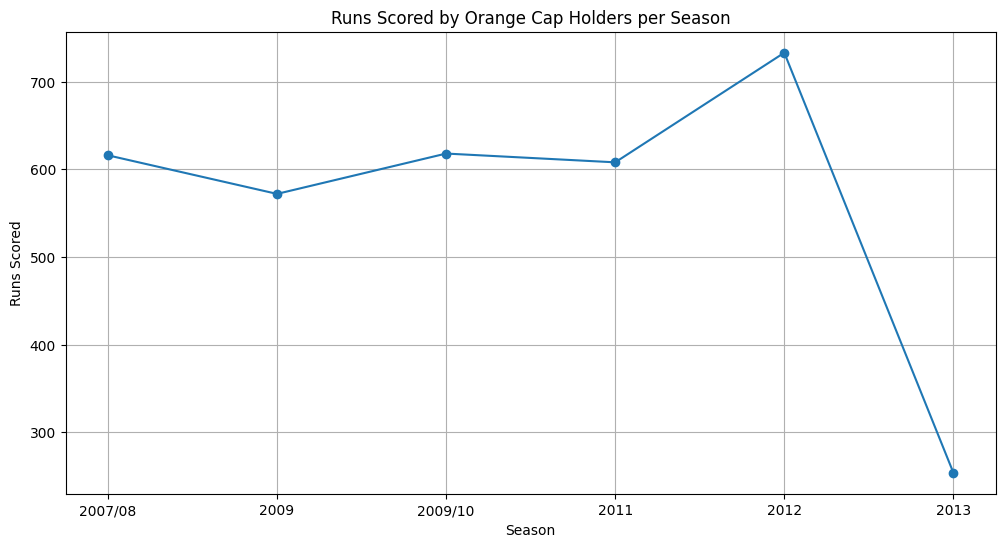

In [ ]:
import pandas as pd

# Assuming 'match' and 'delivery' DataFrames are already loaded

# 1. Merge delivery and match data to get the 'season' column
delivery = pd.merge(delivery, match[['id', 'season']], left_on='match_id', right_on='id', how='left')

# 2. Calculate total runs for each batsman in each season
batsman_season_runs = delivery.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()

# 3. Find the Orange Cap holder for each season
orange_cap_holders = batsman_season_runs.loc[batsman_season_runs.groupby('season')['batsman_runs'].idxmax()]

# 4. Display the Orange Cap holders and their runs
print("Orange Cap Holders and Their Runs per Season:")
print(orange_cap_holders[['season', 'batter', 'batsman_runs']])

# Optional: Plot the runs scored by Orange Cap holders over the seasons
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(orange_cap_holders['season'], orange_cap_holders['batsman_runs'], marker='o', linestyle='-')
plt.title('Runs Scored by Orange Cap Holders per Season')
plt.xlabel('Season')
plt.ylabel('Runs Scored')
plt.xticks(orange_cap_holders['season'])  # Set x-axis ticks to show all seasons
plt.grid(True)
plt.show()

Track wickets of Purple Cap Holders per season

Purple Cap Holders and Their Wickets per Season:
      season         bowler  dismissal_kind
84   2007/08  Sohail Tanvir              22
174     2009       RP Singh              23
284  2009/10        PP Ojha              21
447     2011     SL Malinga              28
537     2012       M Morkel              25
676     2013      SP Narine              10


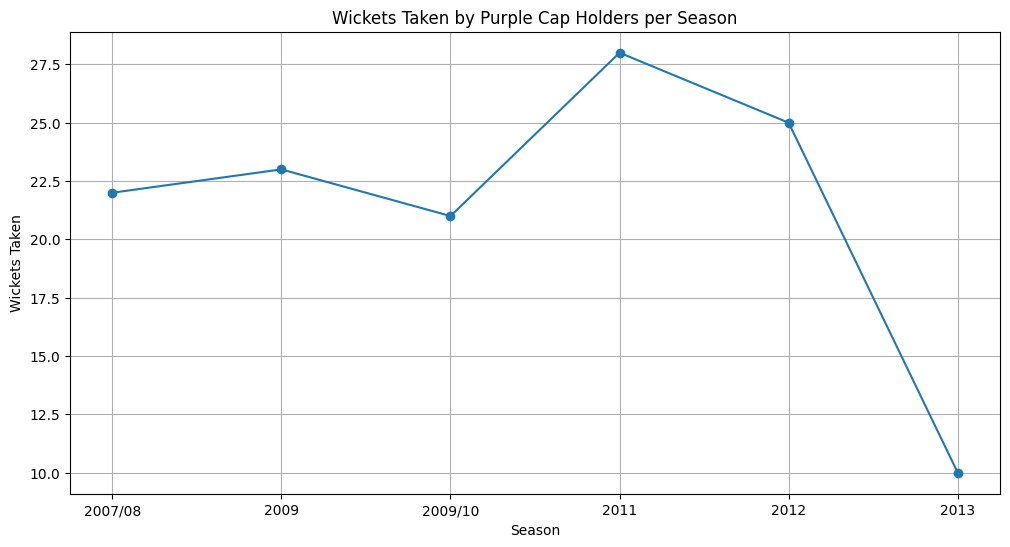

In [153]:
import pandas as pd

# Assuming 'match' and 'delivery' DataFrames are already loaded

# Create a copy of the delivery DataFrame to avoid modifying the original
delivery_copy = delivery.copy()

# 1. Merge delivery_copy and match data to get the 'season' column
delivery_copy = pd.merge(delivery_copy, match[['id', 'season']], left_on='match_id', right_on='id', how='left')

# 2. Filter out run outs and get wickets per bowler per season
# The 'season' column is now available in delivery_copy after the merge
wickets_per_bowler_season = delivery_copy[delivery_copy['dismissal_kind'] != 'run out'].groupby(['season', 'bowler'])['dismissal_kind'].count().reset_index()

# 3. Find the Purple Cap holder for each season
purple_cap_holders = wickets_per_bowler_season.loc[wickets_per_bowler_season.groupby('season')['dismissal_kind'].idxmax()]

# 4. Display the Purple Cap holders and their wickets
print("Purple Cap Holders and Their Wickets per Season:")
print(purple_cap_holders[['season', 'bowler', 'dismissal_kind']])

# Optional: Plot the wickets taken by Purple Cap holders over the seasons
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(purple_cap_holders['season'], purple_cap_holders['dismissal_kind'], marker='o', linestyle='-')
plt.title('Wickets Taken by Purple Cap Holders per Season')
plt.xlabel('Season')
plt.ylabel('Wickets Taken')
plt.xticks(purple_cap_holders['season'])  # Set x-axis ticks to show all seasons
plt.grid(True)
plt.show()

# Find top 10 bowlers per season

In [154]:
import pandas as pd

# Assuming 'match' and 'delivery' DataFrames are already loaded

# 1. Merge delivery and match data to get the 'season' column
delivery = pd.merge(delivery, match[['id', 'season']], left_on='match_id', right_on='id', how='left')

# 2. Filter out run outs and group by season and bowler to count wickets
wickets_per_bowler_season = delivery[delivery['dismissal_kind'] != 'run out'].groupby(['season', 'bowler'])['dismissal_kind'].count().reset_index()

# 3. Rename the 'dismissal_kind' column to 'wickets' for clarity
wickets_per_bowler_season.rename(columns={'dismissal_kind': 'wickets'}, inplace=True)

# 4. Get the top 10 bowlers for each season
def get_top_bowlers(df):
    return df.sort_values(by=['wickets'], ascending=False).head(10)

top_bowlers_per_season = wickets_per_bowler_season.groupby('season').apply(get_top_bowlers).reset_index(drop=True)

# 5. Display the results
print("Top 10 Bowlers per Season:")
print(top_bowlers_per_season)

Top 10 Bowlers per Season:
     season           bowler  wickets
0   2007/08    Sohail Tanvir       22
1   2007/08      S Sreesanth       19
2   2007/08         SK Warne       19
3   2007/08        JA Morkel       17
4   2007/08          MS Gony       17
5   2007/08        SR Watson       17
6   2007/08        PP Chawla       17
7   2007/08        VY Mahesh       16
8   2007/08         RP Singh       15
9   2007/08      MF Maharoof       15
10     2009         RP Singh       23
11     2009         A Kumble       21
12     2009          A Nehra       19
13     2009          PP Ojha       18
14     2009       SL Malinga       18
15     2009        IK Pathan       17
16     2009         MM Patel       16
17     2009        DP Nannes       15
18     2009       PJ Sangwan       15
19     2009       YA Abdulla       14
20  2009/10          PP Ojha       21
21  2009/10         A Mishra       17
22  2009/10         A Kumble       17
23  2009/10  Harbhajan Singh       17
24  2009/10   M Muralit

<ipython-input-154-86d5ea31636c>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_bowlers_per_season = wickets_per_bowler_season.groupby('season').apply(get_top_bowlers).reset_index(drop=True)


In [158]:
teams

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [159]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune'], dtype=object)

In [160]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))